In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date 
import seaborn as sns

## 1. Retrieve Data

In [3]:
# Retrieving Claims Data
c_condition_fp = 'Claims/condition.csv'
c_coverage_fp = 'Claims/coverage.csv'
c_encounter_fp = 'Claims/encounter.csv'
c_med_claim_fp = 'Claims/medical_claim.csv'
c_member_month_fp = 'Claims/member_month.csv'
c_patient_fp = 'Claims/patient.csv'
c_procedure_fp = 'Claims/procedure.csv'

c_condition = pd.read_csv(c_condition_fp)
c_coverage = pd.read_csv(c_coverage_fp)
c_encounter = pd.read_csv(c_encounter_fp)
c_med_claim = pd.read_csv(c_med_claim_fp)
c_member_month = pd.read_csv(c_member_month_fp)
c_patient = pd.read_csv(c_patient_fp)
c_procedure = pd.read_csv(c_procedure_fp)

#Retrieving EHR Data
e_allergy_fp = 'EHR/allergy.csv'
e_condition_fp = 'EHR/condition.csv'
e_encounter_fp = 'EHR/encounter.csv'
e_lab_fp = 'EHR/lab.csv'
e_location_fp = 'EHR/location.csv'
e_medication_fp = 'EHR/medication.csv'
e_patient_fp = 'EHR/patient.csv'
e_practitioner_fp = 'EHR/practitioner.csv'
e_procedure_fp = 'EHR/procedure.csv'
e_vital_sign_fp = 'EHR/vital_sign.csv'

e_allergy = pd.read_csv(e_allergy_fp)
e_condition = pd.read_csv(e_condition_fp)
e_encounter = pd.read_csv(e_encounter_fp)
e_lab = pd.read_csv(e_lab_fp)
e_location = pd.read_csv(e_location_fp)
e_medication = pd.read_csv(e_medication_fp)
e_patient = pd.read_csv(e_patient_fp)
e_practitioner = pd.read_csv(e_practitioner_fp)
e_procedure = pd.read_csv(e_procedure_fp)
e_vital_sign = pd.read_csv(e_vital_sign_fp)

/var/folders/q1/d4srdbfj1d3c__225cmvdx3c0000gn/T/ipykernel_1423/3021675466.py:10: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  c_condition = pd.read_csv(c_condition_fp)
/var/folders/q1/d4srdbfj1d3c__225cmvdx3c0000gn/T/ipykernel_1423/3021675466.py:12: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  c_encounter = pd.read_csv(c_encounter_fp)
/var/folders/q1/d4srdbfj1d3c__225cmvdx3c0000gn/T/ipykernel_1423/3021675466.py:13: DtypeWarning: Columns (9,14,21,22,28) have mixed types. Specify dtype option on import or set low_memory=False.
  c_med_claim = pd.read_csv(c_med_claim_fp)


In [4]:
c_patient.count()


PATIENT_ID       1000
GENDER           1000
BIRTH_DATE       1000
RACE             1000
ZIP_CODE            0
STATE             999
COUNTY            998
DECEASED_FLAG    1000
DEATH_DATE         39
DATA_SOURCE      1000
dtype: int64

In [5]:
e_patient.count()

patient_id     1000
name           1000
gender         1000
race           1000
ethnicity         0
birth_date     1000
death_date        9
death_flag        9
address        1000
city            948
state           948
zip_code        955
phone          1000
email          1000
ssn               0
data_source    1000
dtype: int64

Text(0.5, 1.0, 'Gender distribution for Claims')

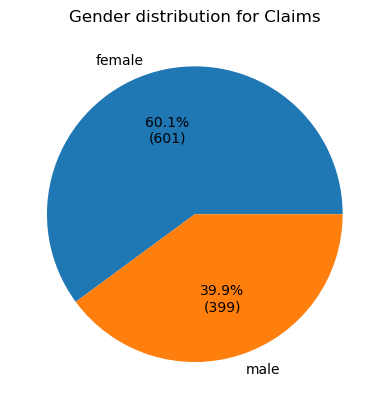

In [6]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

c_gender_pie = c_patient['GENDER'].value_counts()
plt.pie(c_gender_pie,labels = c_gender_pie.index, autopct=autopct_format(c_gender_pie))
plt.title("Gender distribution for Claims")

Text(0.5, 1.0, 'Race distribution for Claims')

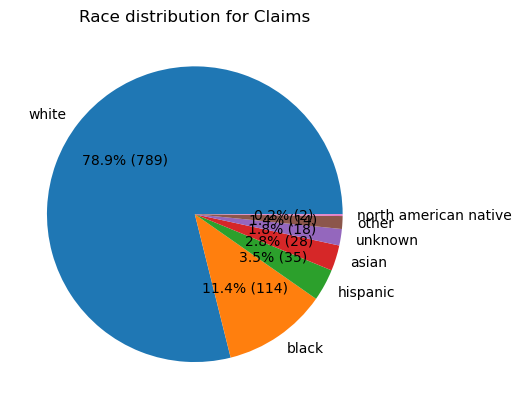

In [7]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}% ({v:d})'.format(pct, v=val)
        return my_format

c_race_pie = c_patient['RACE'].value_counts()
plt.pie(c_race_pie,labels = c_race_pie.index, autopct=autopct_format(c_race_pie))
plt.title("Race distribution for Claims")

In [35]:
c_patient['BIRTH_DATE']

0      1950-02-18
1      1949-12-05
2      1951-10-28
3      1941-09-15
4      1949-11-25
          ...    
995    1946-12-17
996    1950-10-05
997    1948-11-11
998    1934-02-28
999    1923-12-26
Name: BIRTH_DATE, Length: 1000, dtype: object

Text(0.5, 1.0, 'Count of States for Claims Data')

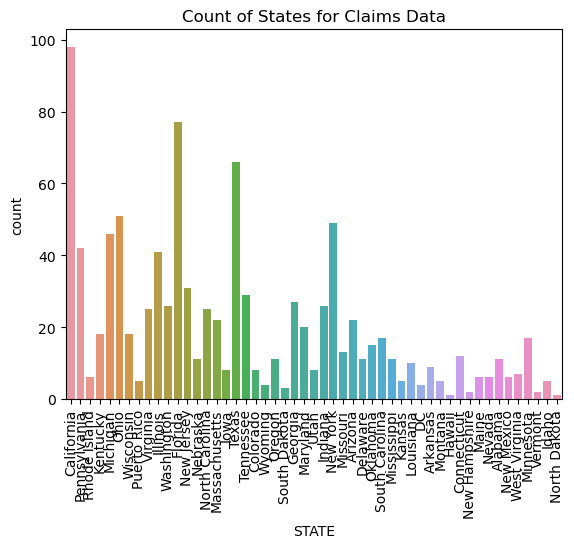

In [10]:
sns.countplot(c_patient, x='STATE')
plt.xticks(rotation=90)
plt.title("Count of States for Claims Data")

In [11]:

# This function converts given date to age 
def age(born): 
    born = datetime.strptime(born, "%Y-%m-%d").date() 
    today = date.today() 
    return today.year - born.year - ((today.month,  
                                      today.day) < (born.month,  
                                                    born.day)) 
  
c_patient['AGE'] = c_patient['BIRTH_DATE'].apply(age) 
  
c_patient.head()

,PATIENT_ID,GENDER,BIRTH_DATE,RACE,ZIP_CODE,STATE,COUNTY,DECEASED_FLAG,DEATH_DATE,DATA_SOURCE,AGE
0,11021,female,1950-02-18,white,NaN,California,San Diego,0,NaN,cclf,74
1,12493,male,1949-12-05,white,NaN,Pennsylvania,Westmoreland,0,NaN,cclf,74
2,13208,female,1951-10-28,white,NaN,Rhode Island,Washington,0,NaN,cclf,72
3,12526,female,1941-09-15,white,NaN,Kentucky,Lewis,0,NaN,cclf,82
4,11468,female,1949-11-25,white,NaN,Michigan,Lapeer,0,NaN,cclf,74


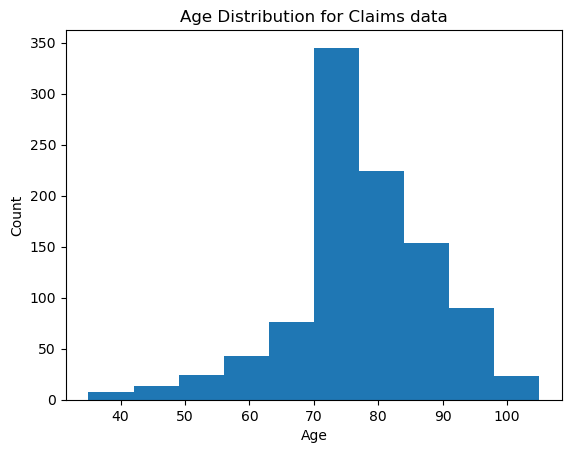

In [12]:
plt.hist(c_patient['AGE'])
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution for Claims data")
plt.show()

In [13]:
c_condition.count()

ENCOUNTER_ID        210912
PATIENT_ID          210912
CONDITION_DATE      210912
CONDITION_TYPE      210912
CODE_TYPE           210912
CODE                210912
DESCRIPTION         210767
DIAGNOSIS_RANK      210912
PRESENT_ON_ADMIT      3750
DATA_SOURCE         210912
dtype: int64

In [14]:
c_member_month['PAYER'].unique()

array(['medicare'], dtype=object)

In [15]:
c_member_month.head()

,PATIENT_ID,PAYER,MONTH,YEAR,DUAL_STATUS,MEDICARE_STATUS,DATA_SOURCE
0,10,medicare,1,2016,NaN,10.0,cclf
1,10,medicare,2,2016,NaN,10.0,cclf
2,10,medicare,3,2016,NaN,10.0,cclf
3,10,medicare,4,2016,NaN,10.0,cclf
4,10,medicare,5,2016,NaN,10.0,cclf


In [16]:
c_condition.head()

,ENCOUNTER_ID,PATIENT_ID,CONDITION_DATE,CONDITION_TYPE,CODE_TYPE,CODE,DESCRIPTION,DIAGNOSIS_RANK,PRESENT_ON_ADMIT,DATA_SOURCE
0,b5cd11bd97b86a7d17bb6c22d79e45de,11531,2017-08-22,discharge diagnosis,icd-10-cm,R946,Abnormal results of thyroid function studies,2,NaN,cclf
1,654efcf41bdbd1b130bedf6541d6e039,11199,2017-11-29,discharge diagnosis,icd-10-cm,N23,Unspecified renal colic,3,NaN,cclf
2,eacf83e34e5f0227af22b865e4ad69b4,10323,2016-01-22,discharge diagnosis,icd-10-cm,R300,Dysuria,2,NaN,cclf
3,83cd137c3118c9b98c5595b51c56ec7c,10011,2016-09-14,discharge diagnosis,icd-10-cm,M546,Pain in thoracic spine,4,NaN,cclf
4,1fc6105e240588f04f8e5877ca964395,10070,2017-09-04,discharge diagnosis,icd-10-cm,M7062,"Trochanteric bursitis, left hip",2,NaN,cclf


In [17]:
c_coverage['PAYER_TYPE'].unique()

array(['medicare'], dtype=object)

In [18]:
c_encounter.count()

ENCOUNTER_ID                         77521
PATIENT_ID                           77521
ENCOUNTER_TYPE                       77521
ENCOUNTER_START_DATE                 77521
ENCOUNTER_END_DATE                   77521
ADMIT_SOURCE_CODE                      537
ADMIT_SOURCE_DESCRIPTION               537
ADMIT_TYPE_CODE                        537
ADMIT_TYPE_DESCRIPTION                 537
DISCHARGE_DISPOSITION_CODE            7318
DISCHARGE_DISPOSITION_DESCRIPTION     7318
PHYSICIAN_NPI                        77471
LOCATION                                 0
FACILITY_NPI                          7318
MS_DRG                                 544
PAID_AMOUNT                          77521
CHARGE_AMOUNT                        77521
DATA_SOURCE                          77521
dtype: int64

In [19]:
c_encounter['ENCOUNTER_TYPE'].unique()

array(['ambulatory surgical center', 'office visit', 'other',
       'outpatient', 'skilled nursing facility', 'home health',
       'emergency department', 'professional only acute inpatient',
       'acute inpatient', 'urgent care', 'inpatient rehabilitation',
       'mental health center', 'unmapped', 'hospice',
       'outpatient rehabilitation', 'inpatient psychiatric',
       'dialysis center', 'substance abuse treatment facility'],
      dtype=object)

Text(0.5, 1.0, 'Count of Encounter Type for Claims Data')

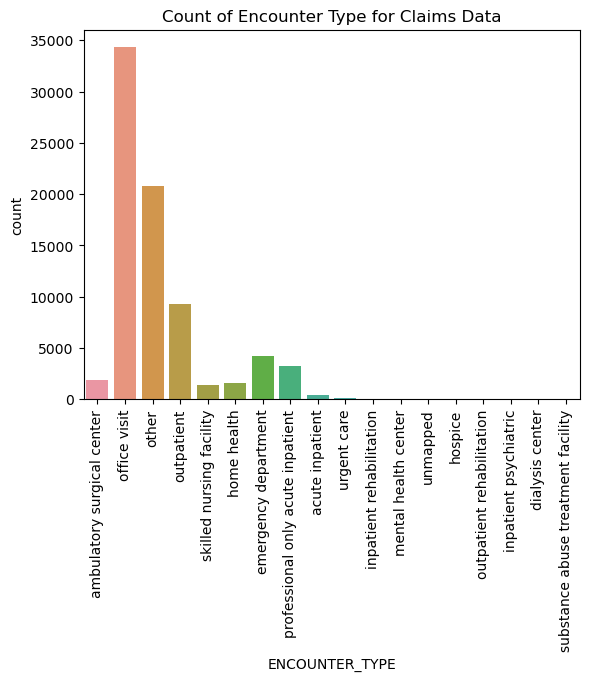

In [20]:
sns.countplot(c_encounter, x='ENCOUNTER_TYPE')
plt.xticks(rotation=90)
plt.title("Count of Encounter Type for Claims Data")

In [82]:
print(c_med_claim.head())

                           CLAIM_ID  CLAIM_LINE_NUMBER CLAIM_TYPE  \
0  7d04bad7fc1be9d0a80037de9dcb19a0                  1          I   
1  7d04bad7fc1be9d0a80037de9dcb19a0                  2          I   
2  7d04bad7fc1be9d0a80037de9dcb19a0                  3          I   
3  7d04bad7fc1be9d0a80037de9dcb19a0                  4          I   
4  7d04bad7fc1be9d0a80037de9dcb19a0                  5          I   

                       ENCOUNTER_ID  PATIENT_ID CLAIM_START_DATE  \
0  7d04bad7fc1be9d0a80037de9dcb19a0       10226       2018-02-28   
1  7d04bad7fc1be9d0a80037de9dcb19a0       10226       2018-02-28   
2  7d04bad7fc1be9d0a80037de9dcb19a0       10226       2018-02-28   
3  7d04bad7fc1be9d0a80037de9dcb19a0       10226       2018-02-28   
4  7d04bad7fc1be9d0a80037de9dcb19a0       10226       2018-02-28   

  CLAIM_END_DATE CLAIM_LINE_START_DATE CLAIM_LINE_END_DATE BILL_TYPE_CODE  \
0     2018-02-28                   NaN                 NaN            131   
1     2018-02-28      

In [32]:
c_med_claim[c_med_claim["PATIENT_ID"]==10226]["CLAIM_START_DATE"]

0        2018-02-28
1        2018-02-28
2        2018-02-28
3        2018-02-28
4        2018-02-28
            ...    
41663    2017-05-16
41664    2017-05-16
41665    2017-05-16
41666    2017-05-16
43361    2017-09-23
Name: CLAIM_START_DATE, Length: 115, dtype: object

In [37]:
import matplotlib.dates as mdates

for i in c_med_claim["PATIENT_ID"].unique():
    print(i, "\t\t", sorted(c_med_claim[c_med_claim["PATIENT_ID"]==i]["CLAIM_START_DATE"].unique())[0], "\t", sorted(c_med_claim[c_med_claim["PATIENT_ID"]==i]["CLAIM_END_DATE"].unique())[-1])
    
#print(sorted(c_med_claim['CLAIM_START_DATE'].unique()))

10226 		 2017-01-31 	 2018-12-10
10133 		 2016-01-18 	 2018-12-04
10163 		 2016-05-08 	 2018-12-24
1003 		 2016-01-21 	 2018-07-14
10017 		 2016-06-02 	 2018-05-14
10125 		 2016-01-26 	 2017-08-20
10046 		 2016-02-15 	 2018-11-17
10186 		 2016-02-07 	 2018-12-01
10126 		 2016-03-14 	 2018-11-20
10025 		 2016-04-01 	 2018-11-22
10174 		 2016-01-08 	 2018-11-01
10200 		 2016-02-03 	 2018-10-06
10075 		 2016-01-23 	 2018-11-25
10159 		 2016-02-17 	 2018-11-21
10007 		 2016-02-02 	 2018-09-24
1008 		 2016-02-01 	 2018-11-06
10026 		 2016-01-25 	 2018-11-27
10085 		 2016-09-01 	 2017-09-25
10318 		 2016-01-25 	 2018-12-08
12620 		 2016-02-02 	 2018-12-28
11593 		 2016-01-28 	 2018-09-26
13168 		 2016-01-09 	 2018-01-19
10472 		 2016-01-16 	 2018-06-19
1077 		 2016-02-23 	 2018-08-10
13306 		 2016-02-07 	 2018-02-14
12076 		 2016-01-28 	 2018-05-14
1228 		 2016-01-26 	 2018-06-17
10650 		 2016-04-03 	 2018-12-11
12455 		 2016-01-09 	 2018-12-05
10113 		 2016-01-26 	 2018-12-20
10137 		 2016-

12140 		 2016-02-03 	 2018-10-24
11098 		 2016-02-20 	 2018-06-18
132 		 2016-08-15 	 2018-10-14
11318 		 2016-01-12 	 2018-10-21
11021 		 2016-02-06 	 2018-10-08
11973 		 2016-03-07 	 2018-08-18
13076 		 2016-05-30 	 2016-09-16
13235 		 2016-03-21 	 2018-07-29
11543 		 2016-02-06 	 2018-11-30
10630 		 2016-01-14 	 2018-12-10
12964 		 2016-02-01 	 2018-09-18
11745 		 2016-01-27 	 2018-12-16
10573 		 2016-01-19 	 2018-11-21
10421 		 2016-02-06 	 2018-07-01
10651 		 2016-01-22 	 2018-05-14
13143 		 2016-01-07 	 2017-11-30
11303 		 2016-02-08 	 2018-09-20
13178 		 2016-03-15 	 2018-10-16
1198 		 2016-04-02 	 2018-12-03
12136 		 2016-02-17 	 2018-06-19
10867 		 2016-01-15 	 2018-11-25
10112 		 2016-09-18 	 2018-12-04
11715 		 2016-02-18 	 2018-11-29
11383 		 2016-01-25 	 2018-06-26
13208 		 2016-01-19 	 2018-12-10
10410 		 2016-01-18 	 2018-12-05
11631 		 2016-02-02 	 2018-01-24
12182 		 2016-01-18 	 2018-09-12
12284 		 2016-04-16 	 2018-06-15
11357 		 2016-01-30 	 2018-12-16
11524 		 2016

10526 		 2016-06-18 	 2018-01-27
10279 		 2018-02-22 	 2018-03-31
12745 		 2016-02-18 	 2018-11-15
11096 		 2016-07-31 	 2016-09-30
13172 		 2016-02-15 	 2018-02-19
12015 		 2016-05-15 	 2018-12-01
10450 		 2016-02-10 	 2018-05-27
10216 		 2018-09-20 	 2018-11-23
1039 		 2017-01-18 	 2018-12-14
12646 		 2016-01-29 	 2016-01-29
12093 		 2016-01-30 	 2018-09-29
10485 		 2016-01-21 	 2018-01-15
1086 		 2016-02-27 	 2018-05-05
10367 		 2017-08-21 	 2018-11-17
11591 		 2016-01-18 	 2018-10-28
12513 		 2016-02-06 	 2018-12-15
12637 		 2016-02-14 	 2018-10-05
10053 		 2016-08-31 	 2018-11-08
13160 		 2016-01-19 	 2018-10-31
10965 		 2016-10-23 	 2018-10-11
12009 		 2016-02-25 	 2018-10-01
1053 		 2016-03-09 	 2018-10-17
12348 		 2016-05-20 	 2018-08-04
10276 		 2017-10-08 	 2018-12-12
11236 		 2016-02-11 	 2018-12-06
11458 		 2016-12-07 	 2018-09-05
13091 		 2016-02-25 	 2018-08-11
10182 		 2016-09-26 	 2018-11-05
13231 		 2017-09-04 	 2018-08-15
12720 		 2016-02-02 	 2018-12-04
10976 		 2016

In [36]:
c_encounter.head()

,ENCOUNTER_ID,PATIENT_ID,ENCOUNTER_TYPE,ENCOUNTER_START_DATE,ENCOUNTER_END_DATE,ADMIT_SOURCE_CODE,ADMIT_SOURCE_DESCRIPTION,ADMIT_TYPE_CODE,ADMIT_TYPE_DESCRIPTION,DISCHARGE_DISPOSITION_CODE,DISCHARGE_DISPOSITION_DESCRIPTION,PHYSICIAN_NPI,LOCATION,FACILITY_NPI,MS_DRG,PAID_AMOUNT,CHARGE_AMOUNT,DATA_SOURCE
0,28f8763b3f15d5bbe9af785ef24d31a9,12349,ambulatory surgical center,2017-07-28,2017-07-28,NaN,NaN,NaN,NaN,NaN,NaN,1.326132e+09,NaN,NaN,NaN,2464.38,663.93,cclf
1,b090a561497b6d311f6b8c2c9b062920,12135,office visit,2016-10-17,2016-10-17,NaN,NaN,NaN,NaN,NaN,NaN,1.801973e+09,NaN,NaN,NaN,118.51,152.85,cclf
2,d865e2f0e85e9f463e55c562ce27453e,10239,office visit,2017-05-12,2017-05-12,NaN,NaN,NaN,NaN,NaN,NaN,1.679562e+09,NaN,NaN,NaN,14.68,15.25,cclf
3,0975e342743ce6c48cdf2e405ed836a0,10099,other,2018-12-18,2018-12-18,NaN,NaN,NaN,NaN,NaN,NaN,1.235187e+09,NaN,NaN,NaN,10.78,10.90,cclf
4,a2eb9ef0173fc9fb5f748533e0313fa1,13003,outpatient,2017-11-12,2017-11-12,NaN,NaN,NaN,NaN,NaN,NaN,1.740251e+09,NaN,NaN,NaN,55.61,70.01,cclf


In [38]:
import matplotlib.dates as mdates

for i in c_encounter["PATIENT_ID"].unique():
    print(i, "\t\t", sorted(c_encounter[c_encounter["PATIENT_ID"]==i]["ENCOUNTER_START_DATE"].unique())[0], "\t", sorted(c_encounter[c_encounter["PATIENT_ID"]==i]["ENCOUNTER_END_DATE"].unique())[-1])
 

12349 		 2016-01-23 	 2018-11-03
12135 		 2016-02-17 	 2018-11-07
10239 		 2016-02-07 	 2018-04-09
10099 		 2016-01-25 	 2018-12-18
13003 		 2016-08-16 	 2018-12-01
10557 		 2016-01-26 	 2018-08-13
11231 		 2016-07-17 	 2017-07-23
13374 		 2016-04-26 	 2018-12-10
11990 		 2016-01-22 	 2017-12-22
11537 		 2016-06-14 	 2018-10-03
13055 		 2017-12-31 	 2018-08-24
10240 		 2016-01-22 	 2018-11-30
1070 		 2016-05-22 	 2018-07-23
12544 		 2016-02-03 	 2018-10-30
13141 		 2016-01-18 	 2018-12-05
1228 		 2016-01-26 	 2018-06-17
10261 		 2016-01-23 	 2018-09-08
10297 		 2016-01-30 	 2018-11-12
1298 		 2016-07-04 	 2018-08-13
11465 		 2016-02-02 	 2018-10-05
10137 		 2016-02-05 	 2018-08-10
11486 		 2016-01-24 	 2018-09-02
13129 		 2016-01-16 	 2018-05-16
13360 		 2016-07-14 	 2018-06-09
10200 		 2016-02-03 	 2018-10-06
13320 		 2016-02-20 	 2018-12-02
12215 		 2016-03-14 	 2018-07-26
11369 		 2016-02-13 	 2018-10-31
12325 		 2016-01-06 	 2018-06-06
10731 		 2016-02-11 	 2018-08-25
12086 		 2016

10852 		 2016-01-29 	 2018-12-25
10631 		 2016-01-17 	 2018-12-10
11270 		 2016-02-12 	 2018-10-24
12938 		 2017-01-06 	 2018-12-07
11181 		 2016-02-12 	 2018-03-23
10450 		 2016-02-10 	 2018-05-27
1060 		 2016-01-01 	 2018-05-02
13113 		 2016-01-20 	 2018-08-20
13060 		 2016-02-03 	 2018-12-28
10130 		 2016-03-31 	 2018-01-15
10131 		 2016-03-29 	 2018-10-21
12978 		 2016-01-28 	 2018-11-13
12926 		 2016-02-02 	 2018-10-26
10382 		 2016-01-25 	 2018-11-21
1261 		 2016-01-26 	 2018-06-25
11391 		 2016-03-30 	 2018-12-13
13317 		 2016-02-23 	 2018-11-20
10070 		 2016-03-23 	 2018-12-21
12348 		 2016-05-20 	 2018-08-04
1331 		 2016-01-16 	 2018-12-05
1251 		 2016-02-23 	 2018-08-14
1039 		 2017-01-18 	 2018-12-14
12687 		 2016-02-04 	 2018-08-07
12697 		 2016-03-02 	 2018-08-06
11199 		 2016-02-05 	 2018-06-19
10472 		 2016-01-16 	 2018-06-19
12918 		 2016-04-28 	 2018-09-16
1311 		 2016-04-20 	 2018-06-29
12415 		 2016-01-24 	 2018-10-25
10526 		 2016-06-18 	 2018-01-27
10058 		 2016-02

11655 		 2018-01-28 	 2018-01-28
10930 		 2018-05-07 	 2018-05-07
13197 		 2018-10-21 	 2018-11-21
12068 		 2016-01-25 	 2018-06-17
12586 		 2016-06-06 	 2016-06-06
13068 		 2016-02-09 	 2018-12-12
11219 		 2016-12-26 	 2018-12-01
10168 		 2017-06-02 	 2018-12-03
12054 		 2018-11-18 	 2018-11-18
12320 		 2018-10-23 	 2018-11-29
10702 		 2018-01-08 	 2018-01-08
10601 		 2016-03-14 	 2016-04-02
10889 		 2018-06-23 	 2018-06-23
12812 		 2018-12-09 	 2018-12-09
11118 		 2018-12-21 	 2018-12-21
11802 		 2018-12-07 	 2018-12-23
12419 		 2017-06-29 	 2018-09-15
12569 		 2018-12-22 	 2018-12-22
11612 		 2016-09-17 	 2016-09-17
10857 		 2018-09-13 	 2018-11-26
12594 		 2018-10-27 	 2018-10-27
13159 		 2018-09-15 	 2018-09-15
13167 		 2018-12-16 	 2018-12-16
13137 		 2018-11-26 	 2018-11-26
10185 		 2018-11-09 	 2018-11-09
10175 		 2018-12-03 	 2018-12-03
10087 		 2018-03-12 	 2018-03-12
1102 		 2018-12-07 	 2018-12-22
